#<b>Milestone 2

###<b> Mounting the Drive

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks/CNN Project Malaria Detection"

cell_images.zip


###<b>Loading libraries</b>

In [ ]:
#Importing libraries required to load the data

import zipfile
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU, GlobalAvgPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
#Storing the path of the data file from the Google drive
path = '/content/drive/My Drive/Colab Notebooks/CNN Project Malaria Detection/cell_images.zip'


#The data is provided as a zip file so we need to extract the files from the zip file


with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

The files have been extracted to the local session of Google Colab. The extracted folder would have the following structure:

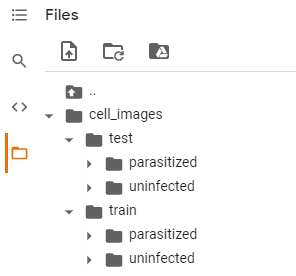

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [ ]:
#Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

#Size of image so that each image has the same size
SIZE = 64
#SIZE = 224

#Empty list to store the training images after they are converted to NumPy arrays
train_images = []

#Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [ ]:
#We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    #Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            #Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            #Resizing each image to (224,224)
            image = image.resize((SIZE, SIZE))

            #Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            #Creating labels for parasitized and uninfected images
            if folder_name=='/parasitized/':
                train_labels.append(1)
            else:
                train_labels.append(0)
        except Exception:
            pass       

#Converting lists to arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [ ]:
#Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

#Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64
#SIZE = 224

#Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

#Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [ ]:
#We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    #Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            #Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            #Resizing each image to (128,128)
            image = image.resize((SIZE, SIZE))
            
            #Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            #Creating labels for parasitized and uninfected images
            if folder_name=='/parasitized/':
                test_labels.append(1)
            else:
                test_labels.append(0)
        except Exception:
            pass       

#Converting lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

###<b>Normalize the images

In [ ]:
# try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images/255).astype('float32')
test_images = (test_images/255).astype('float32')

As we have done our preprocessing required and performed some EDA to gain some insights in our Milestone-1 so now we will try to build our model and try evaluating its performance.

###<B>One Hot Encoding on the train and test labels

In [ ]:
# Encoding Train Labels
train_labels=to_categorical(train_labels,2)
# Similarly let us try to encode test labels
test_labels=to_categorical(test_labels,2)

### **Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

####<b> Importing the required libraries

In [ ]:
#Clearing backend
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from random import shuffle

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

####<b> Building the model

In [ ]:

#creating sequential model
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4

####<b> Compiling the model

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

<b> Using Callbacks 

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

<b> Fit and train our Model

In [ ]:
#Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 
history=model.fit(train_images,train_labels,batch_size=32,callbacks=callbacks,validation_split=0.2,epochs=20,verbose=1)

Epoch 1/20
624/624 [==============================] - 5s 5ms/step - loss: 0.4032 - accuracy: 0.8133 - val_loss: 0.1867 - val_accuracy: 0.9317
Epoch 2/20
624/624 [==============================] - 3s 5ms/step - loss: 0.1712 - accuracy: 0.9391 - val_loss: 0.1948 - val_accuracy: 0.9449
Epoch 3/20
624/624 [==============================] - 3s 5ms/step - loss: 0.1559 - accuracy: 0.9469 - val_loss: 0.1443 - val_accuracy: 0.9700
Epoch 4/20
624/624 [==============================] - 3s 5ms/step - loss: 0.1475 - accuracy: 0.9504 - val_loss: 0.1398 - val_accuracy: 0.9724
Epoch 5/20
624/624 [==============================] - 3s 5ms/step - loss: 0.1407 - accuracy: 0.9536 - val_loss: 0.1529 - val_accuracy: 0.9619
Epoch 6/20
624/624 [==============================] - 3s 5ms/step - loss: 0.1355 - accuracy: 0.9549 - val_loss: 0.1029 - val_accuracy: 0.9752
Epoch 7/20
624/624 [==============================] - 3s 5ms/step - loss: 0.1304 - accuracy: 0.9553 - val_loss: 0.1627 - val_accuracy: 0.9599
Epoch 

####<b> Evaluating the model on test data

In [ ]:
accuracy = model.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])



82/82 [==============================] - 0s 3ms/step - loss: 0.1538 - accuracy: 0.9496

 Test_Accuracy:- 0.9496153593063354


<b> Plotting the confusion matrix

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1300
           1       0.97      0.93      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



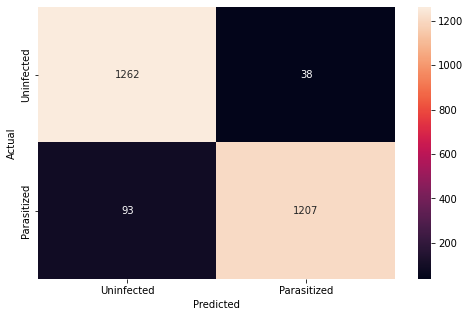

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_labels,axis = 1)

#Printing the classification report
print(classification_report(y_true,pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<b>Plotting the train and validation curves

In [ ]:
# function to plot train and validation accuracy 
def plot_accuracy(history):
    N = len(history.history["accuracy"])
    plt.figure(figsize=(7,7))
    plt.plot(np.arange(0, N), history.history["accuracy"], label="train_accuracy", ls='--')
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy", ls='--')
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")

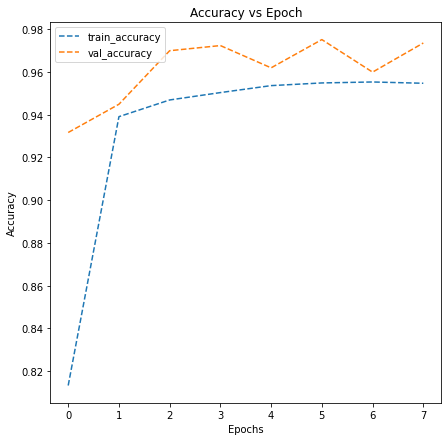

In [ ]:
plot_accuracy(history)



* Here we can clearly observe that the training and valiation accuracy are increasing 
* And we can also notice that validation accuracy is slightly higher than the train accuracy

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

###<b> Model 1
####<b> Trying to improve the performance of our model by adding new layers


In [ ]:
#Clearing backend
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from random import shuffle

import torch.nn as nn

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

####<b> Building the Model

In [ ]:
#creating sequential model
model1=Sequential()

# Build the model here
model1.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=(64,64,3)))
#model1.add(LeakyReLU(alpha=0.1))
model1.add(MaxPooling2D(pool_size=2))

model1.add(Dropout(0.2))
model1.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
#model1.add(LeakyReLU(alpha=0.1))
model1.add(MaxPooling2D(pool_size=2))

model1.add(Dropout(0.2))
model1.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
#model1.add(LeakyReLU(alpha=0.1))
model1.add(MaxPooling2D(pool_size=2))

model1.add(Dropout(0.2))

model1.add(Flatten())

model1.add(Dense(512,activation="relu"))
model1.add(Dropout(0.4))
#model1.add(LeakyReLU(alpha=0.1))
model1.add(Dense(512,activation="relu"))
model1.add(Dropout(0.4))
#model1.add(LeakyReLU(alpha=0.1))

model1.add(Dense(512,activation="relu"))
model1.add(Dropout(0.4))
#model1.add(LeakyReLU(alpha=0.1))


model1.add(Dense(2,activation="softmax"))#2 represent output layer neurons 


model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4

####<b> Compiling the model

In [ ]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


<b> Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

<b>Fit and Train the model

In [ ]:
history1=model1.fit(train_images,train_labels,batch_size=32,callbacks=callbacks,validation_split=0.2,epochs=20,verbose=1)

Epoch 1/20
624/624 [==============================] - 4s 6ms/step - loss: 0.3523 - accuracy: 0.8370 - val_loss: 0.1186 - val_accuracy: 0.9710
Epoch 2/20
624/624 [==============================] - 3s 5ms/step - loss: 0.1662 - accuracy: 0.9471 - val_loss: 0.1092 - val_accuracy: 0.9728
Epoch 3/20
624/624 [==============================] - 3s 5ms/step - loss: 0.1550 - accuracy: 0.9499 - val_loss: 0.1130 - val_accuracy: 0.9661
Epoch 4/20
624/624 [==============================] - 3s 5ms/step - loss: 0.1514 - accuracy: 0.9514 - val_loss: 0.0880 - val_accuracy: 0.9736
Epoch 5/20
624/624 [==============================] - 3s 5ms/step - loss: 0.1441 - accuracy: 0.9544 - val_loss: 0.1514 - val_accuracy: 0.9603
Epoch 6/20
624/624 [==============================] - 3s 5ms/step - loss: 0.1407 - accuracy: 0.9532 - val_loss: 0.1467 - val_accuracy: 0.9694


####<b> Evaluating the model

In [ ]:
accuracy1 = model1.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy1[1])


82/82 [==============================] - 0s 3ms/step - loss: 0.1646 - accuracy: 0.9531

 Test_Accuracy:- 0.9530768990516663


<b> Plotting the confusion matrix

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1300
           1       0.97      0.94      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



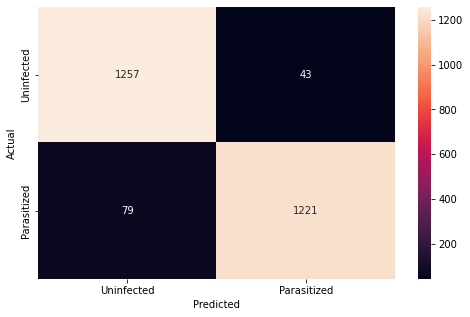

In [ ]:
pred = model1.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_labels,axis = 1)

#Printing the classification report
print(classification_report(y_true,pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<b> Plotting the Train and validation curves

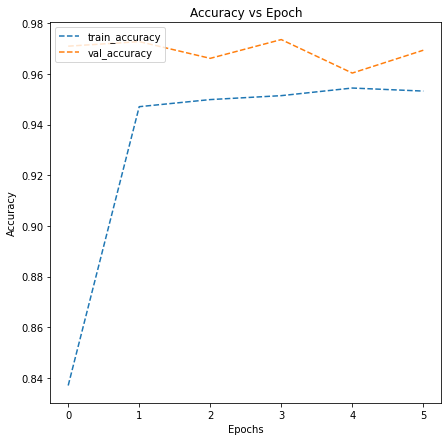

In [ ]:
# function to plot train and validation accuracy 
plot_accuracy(history1)

####<b>Think about it:</b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

###<b> Model 2 with Batch Normalization

In [ ]:
#Clearing backend
from tensorflow.keras import backend
from keras.layers import LeakyReLU

backend.clear_session()

#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

####<b> Building the Model

In [ ]:
model2 = Sequential( )
model2.add(Conv2D(32, (3,3), input_shape=(64, 64, 3), padding='same'))
model2.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=(64,64,3)))
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=2))
model2.add(BatchNormalization())
model2.add(Dropout(0.1))
model2.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=2))
model2.add(BatchNormalization())
model2.add(Dropout(0.1))
model2.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=2))
model2.add(BatchNormalization())
model2.add(Dropout(0.1))
model2.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model2.add(LeakyReLU(alpha=0.1))

model2.add(MaxPooling2D(pool_size=2))
model2.add(BatchNormalization())
model2.add(Dropout(0.1))
model2.add(Flatten())
model2.add(Dense(1024,activation="relu"))
model2.add(BatchNormalization())
model2.add(Dropout(0.1))
model2.add(LeakyReLU(alpha=0.1))

model2.add(Dense(512,activation="relu"))
model2.add(BatchNormalization())
model2.add(Dropout(0.1))
model2.add(LeakyReLU(alpha=0.1))

model2.add(Dense(1024,activation="relu"))
model2.add(BatchNormalization())
model2.add(Dropout(0.1))
model2.add(LeakyReLU(alpha=0.1))
model2.add(Dense(512,activation="relu"))
model2.add(Dropout(0.1))
model2.add(LeakyReLU(alpha=0.1))
model2.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4128      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4

####<b>Compiling the model

In [ ]:
model2.compile(loss="binary_crossentropy", optimizer='adam', metrics = ['accuracy'])

<b> Using callbacks

In [ ]:
'''

create the callbacks similarly as done in the base model
As callbacks will help us in saving our checkpoints and stopping at an accuracy where the model doesnot seem to improve

'''
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

<b>Fit and train the model

In [ ]:
history2 = model2.fit(train_images,train_labels,batch_size=32,callbacks=callbacks,validation_split=0.2,epochs=20,verbose=1)

Epoch 1/20
624/624 [==============================] - 8s 10ms/step - loss: 0.3449 - accuracy: 0.8444 - val_loss: 0.0521 - val_accuracy: 0.9912
Epoch 2/20
624/624 [==============================] - 6s 9ms/step - loss: 0.1756 - accuracy: 0.9390 - val_loss: 0.1602 - val_accuracy: 0.9657
Epoch 3/20
624/624 [==============================] - 6s 9ms/step - loss: 0.1626 - accuracy: 0.9454 - val_loss: 0.0835 - val_accuracy: 0.9804


<b>Plotting the train and validation accuracy

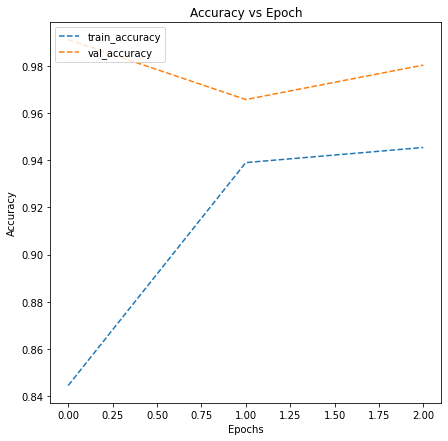

In [ ]:
# plotting the accuracies

plot_accuracy(history2)

####<b>Evaluating the model

In [ ]:
# Evaluate the model to calculate the accuracy
accuracy = model2.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])


82/82 [==============================] - 1s 4ms/step - loss: 0.1936 - accuracy: 0.9362

 Test_Accuracy:- 0.9361538290977478


#####<b>Observations and insights: ____


Batch normalization helped accelerating the training process, standardizing the input of the layres keeping the mean close to the zero and standard deviation close to one. it helped during the training, but not during the inference. 

The reason for that is that the batchNormalization layers is turned off when calculating validation loss.

<b> Generate the classification report and confusion matrix 

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1300
           1       0.98      0.89      0.93      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



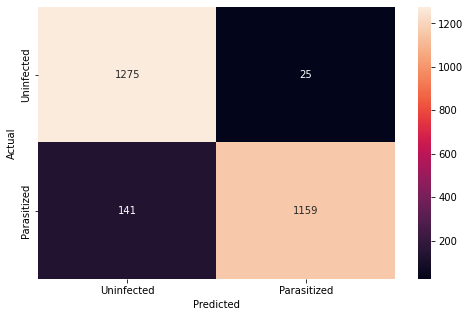

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model2.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_labels,axis = 1)
#Printing the classification report
print(classification_report(y_true,pred))
#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



####**Think About It :**<br>

* Can we improve the model with Image Data Augmentation?
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





###<b>Model 3 with Data Augmentation

In [ ]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

####<b> Using image data generator

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, train_size=0.8, random_state=42)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images

train_datagen = ImageDataGenerator(horizontal_flip=True 
                                  ,zoom_range = 0.5, rotation_range=30)
val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x = X_train, y = y_train, batch_size=64, seed=42, shuffle=True)     

# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x=X_val, y = y_val, batch_size=64, seed=42, shuffle=True)

####**Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.



####<B>Visualizing Augmented images

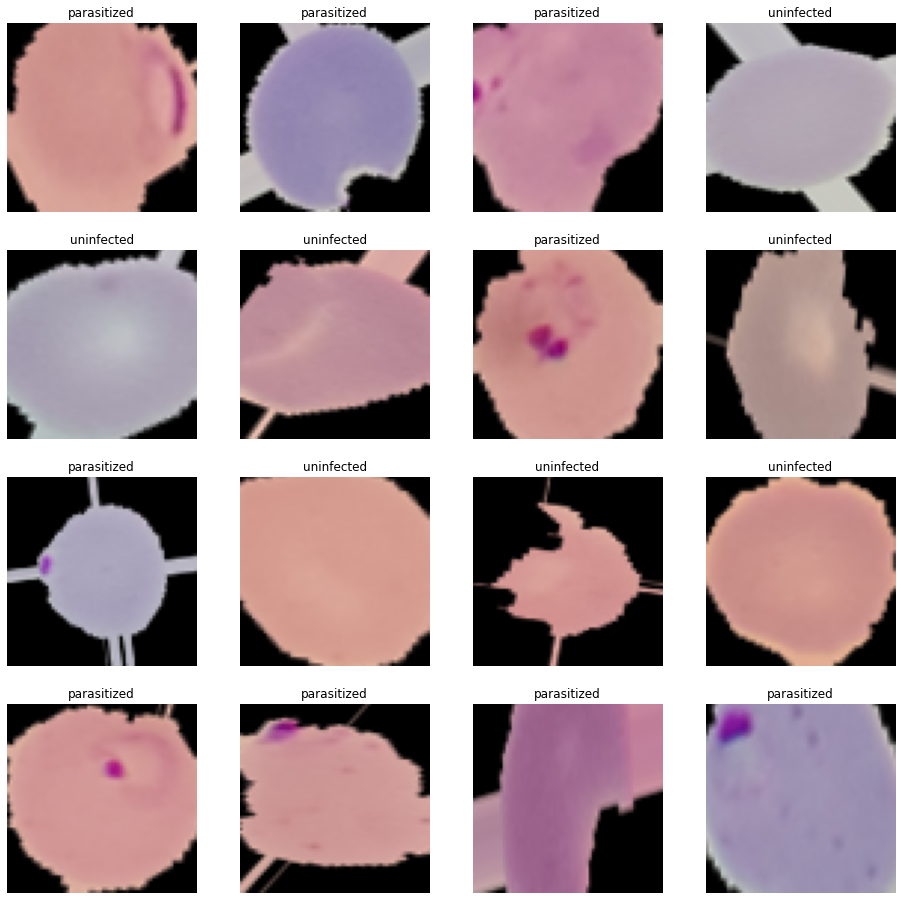

In [ ]:
#Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

#Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))
fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):
    ax.imshow(image)
    if label[1] == 1: 
        ax.set_title('parasitized')
    else:
        ax.set_title('uninfected')
    ax.axis('off')



####<b>Observations and insights: ____

The training data (with good variation) for the nural networks is like the fuel for the rocket engine, the more we have the further the rocket can go.

Flipping, zooming and rotating we could generate new images to feed to our CNN for training, the more data variance we allow for our neural network training, the better prediction we get.


####<b>Building the Model

In [ ]:
model3 = Sequential()

# Build the model here

model3.add(Conv2D(32, (3,3), input_shape=(64, 64, 3), padding='same'))
model3.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=(64,64,3)))
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.1))
model3.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.1))
model3.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.1))
model3.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model3.add(LeakyReLU(alpha=0.1))
'''
model3.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
#model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D(pool_size=2))

model3.add(Dropout(0.1))

model3.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
#model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.1))
model3.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
#model3.add(LeakyReLU(alpha=0.1))
'''

model3.add(Dropout(0.1))
model3.add(Flatten())



model3.add(Dense(1024,activation="relu"))
model3.add(Dropout(0.1))
model3.add(LeakyReLU(alpha=0.3))

model3.add(Dense(512,activation="relu"))
model3.add(Dropout(0.1))
model3.add(LeakyReLU(alpha=0.3))

model3.add(Dense(1024,activation="relu"))
model3.add(Dropout(0.1))
model3.add(LeakyReLU(alpha=0.3))
model3.add(Dense(512,activation="relu"))

'''
model3.add(Dense(1024,activation="relu"))
model3.add(Dropout(0.1))
model3.add(LeakyReLU(alpha=0.1))

model3.add(Dense(512,activation="relu"))
model3.add(Dropout(0.1))
model3.add(LeakyReLU(alpha=0.1))

model3.add(Dense(1024,activation="relu"))
model3.add(Dropout(0.1))
model3.add(LeakyReLU(alpha=0.1))
model3.add(Dense(512,activation="relu"))

'''
model3.add(Dropout(0.1))
model3.add(LeakyReLU(alpha=0.1))
model3.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
model3.summary()



# use this as the optimizer
adam = optimizers.Adam(learning_rate=0.001)

model3.compile(loss='binary_crossentropy', optimizer=adam, metrics = ['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4128      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4128      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0

<b>Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

<b> Fit and Train the model

In [ ]:
history3 = model3.fit(train_generator, 
                                  validation_data=val_generator,
                                  batch_size=32,callbacks=callbacks,
                                  epochs=20,verbose=1)



Epoch 1/20
312/312 [==============================] - 20s 62ms/step - loss: 0.4567 - accuracy: 0.7641 - val_loss: 0.1669 - val_accuracy: 0.9567
Epoch 2/20
312/312 [==============================] - 19s 61ms/step - loss: 0.2461 - accuracy: 0.9184 - val_loss: 0.1591 - val_accuracy: 0.9581
Epoch 3/20
312/312 [==============================] - 19s 62ms/step - loss: 0.2266 - accuracy: 0.9278 - val_loss: 0.1410 - val_accuracy: 0.9595
Epoch 4/20
312/312 [==============================] - 19s 62ms/step - loss: 0.2173 - accuracy: 0.9286 - val_loss: 0.1416 - val_accuracy: 0.9579
Epoch 5/20
312/312 [==============================] - 19s 61ms/step - loss: 0.2145 - accuracy: 0.9261 - val_loss: 0.1418 - val_accuracy: 0.9599


####<B>Evaluating the model

<b>Plot the train and validation accuracy

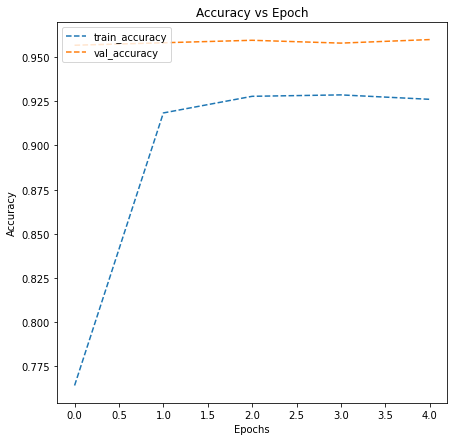

In [ ]:
# plotting the accuracies
plot_accuracy(history3)

In [ ]:
# Evaluating the model on test data
accuracy3 = model3.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy3[1])



82/82 [==============================] - 0s 4ms/step - loss: 0.1607 - accuracy: 0.9550

 Test_Accuracy:- 0.9549999833106995


<B>Plotting the classification report and confusion matrix

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1300
           1       0.96      0.95      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.96      0.96      0.95      2600
weighted avg       0.96      0.95      0.95      2600



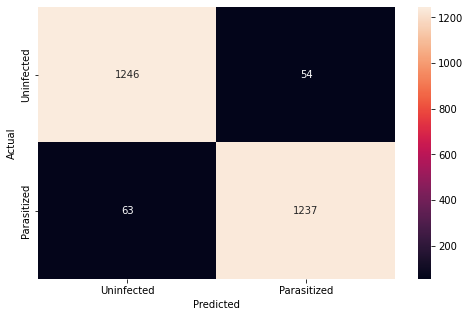

In [ ]:
pred = model3.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_labels,axis = 1)

#Printing the classification report
print(classification_report(y_true,pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

###Image Augmentation HSV 
I want to try converting data to HSV and feed it to the same module to see what difference that makes


In [239]:
import cv2
gfx=[]   # to hold the HSV image array
for i in np.arange(0,len(train_images),1):
  a=cv2.cvtColor(train_images[i],cv2.COLOR_BGR2HSV)
  gfx.append(a)

train_img_gfx=np.array(gfx)
gfxtst=[]   # to hold the HSV image array
for i in np.arange(0,len(test_images),1):
  a=cv2.cvtColor(test_images[i],cv2.COLOR_BGR2HSV)
  gfxtst.append(a)
test_img_gfx=np.array(gfxtst)

print(test_img_gfx.shape)
print(train_img_gfx.shape)
print(train_labels.shape)

(2600, 64, 64, 3)
(24958, 64, 64, 3)
(24958, 2)


In [250]:
model3_hsv= keras.models.clone_model(model3)
X_train_hsv, X_val, y_train_hsv, y_val = train_test_split(train_img_gfx, train_labels, train_size=0.8, random_state=42)
model3_hsv.compile(loss='binary_crossentropy', optimizer=adam, metrics = ['accuracy'])
history3_hsv = model3_hsv.fit(X_train_hsv,y_train_hsv,batch_size=16,callbacks=callbacks,epochs=20,verbose=1,validation_split=0.2)
accuracy3_hsv = model3_hsv.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy3_hsv[1])

Epoch 1/20
999/999 [==============================] - 8s 7ms/step - loss: 0.8000 - accuracy: 0.5097 - val_loss: 0.6931 - val_accuracy: 0.4940
Epoch 2/20
999/999 [==============================] - 7s 7ms/step - loss: 0.6931 - accuracy: 0.5170 - val_loss: 0.6923 - val_accuracy: 0.5190
Epoch 3/20
999/999 [==============================] - 6s 6ms/step - loss: 0.6919 - accuracy: 0.5289 - val_loss: 0.6908 - val_accuracy: 0.5298
Epoch 4/20
999/999 [==============================] - 7s 7ms/step - loss: 0.6894 - accuracy: 0.5444 - val_loss: 0.6864 - val_accuracy: 0.5546
Epoch 5/20
999/999 [==============================] - 7s 7ms/step - loss: 0.6872 - accuracy: 0.5544 - val_loss: 0.6893 - val_accuracy: 0.5125
Epoch 6/20
999/999 [==============================] - 7s 7ms/step - loss: 0.6879 - accuracy: 0.5476 - val_loss: 0.6793 - val_accuracy: 0.5736
Epoch 7/20
999/999 [==============================] - 7s 7ms/step - loss: 0.6829 - accuracy: 0.5643 - val_loss: 0.7027 - val_accuracy: 0.5351
Epoch 

Could not achieve better accuracy with HSV, however changing hyperparameters and altering structure might help.

###Image Augmentation Gaussian Blurring

In [251]:
gbxblur=[]  ## to hold the blurred images
for i in np.arange(0,len(train_images),1):
  b= cv2.GaussianBlur(train_images[i], (5, 5), 0)
  gbxblur.append(b)
train_img_blr=np.array(gbxblur)

X_train_blr, X_val, y_train_blr, y_val = train_test_split(train_img_blr, train_labels, train_size=0.8, random_state=42)
model3_blr= keras.models.clone_model(model3)
model3_blr.compile(loss='binary_crossentropy', optimizer=adam, metrics = ['accuracy'])
history3_blr = model3_blr.fit(X_train_blr,y_train_blr,batch_size=64,callbacks=callbacks,epochs=20,verbose=1,validation_split=0.2)
accuracy3_blr = model3_blr.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy3_blr[1])

Epoch 1/20
250/250 [==============================] - 5s 15ms/step - loss: 0.6973 - accuracy: 0.4977 - val_loss: 0.6933 - val_accuracy: 0.4940
Epoch 2/20
250/250 [==============================] - 3s 13ms/step - loss: 0.6932 - accuracy: 0.4912 - val_loss: 0.6931 - val_accuracy: 0.5060
Epoch 3/20
250/250 [==============================] - 3s 13ms/step - loss: 0.6932 - accuracy: 0.4990 - val_loss: 0.6932 - val_accuracy: 0.4940
Epoch 4/20
250/250 [==============================] - 3s 13ms/step - loss: 0.6932 - accuracy: 0.4974 - val_loss: 0.6931 - val_accuracy: 0.5060
Epoch 5/20
250/250 [==============================] - 3s 13ms/step - loss: 0.6932 - accuracy: 0.4989 - val_loss: 0.6931 - val_accuracy: 0.5060
Epoch 6/20
82/82 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000

 Test_Accuracy:- 0.5


Gaussian blur did not perform well with this CNN



<b> Now let us try to use a pretrained model like VGG16 and check how it performs on our data.

### **Pre-trained model (VGG16)**

In [ ]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
#@title Default title text
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

vgg = VGG16(include_top=False, weights='imagenet', input_shape=(64,64,3))
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [ ]:
transfer_layer = vgg.get_layer('block5_pool')
vgg.trainable=True

# Add classification layers on top of it  
x = Flatten()(transfer_layer.output) #Flatten the output from the 3rd block of the VGG16 model
x = Dense(256, activation='relu')(x)

# Similarly add a dense layer with 128 neurons
#x = Dropout(0.15)(x)
x = Dense(128, activation='relu')(x)

# Add a dense layer with 64 neurons
x = Dense(64, activation='relu')(x)
#x = BatchNormalization()(x)
#x = Dense(64, activation='softmax')(x)
pred = Dense(2, activation='softmax')(x)

model4 = Model(vgg.input, pred) #Initializing the model

####<b>Compiling the model

In [ ]:
# Compiling the model 
adam = optimizers.Adam(learning_rate=0.001)

#model4.compile(loss='binary_crossentropy', optimizer=adam, metrics = ['accuracy'])
model4.compile(loss='binary_crossentropy', optimizer=adam, metrics = ['accuracy'])

<b> using callbacks

In [ ]:
# Adding Callbacks to the model
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

<b>Fit and Train the model

In [ ]:
print(images.shape)
print(labels.shape)
print(X_train.shape)
print(y_train.shape)
type(labels)


(64, 64, 64, 3)
(64, 2)
(19966, 64, 64, 3)
(19966, 2)


numpy.ndarray

In [ ]:
#Fitting the model and running the model for 10 epochs
history4 = model4.fit(train_images,train_labels,epochs=10,callbacks=callbacks,batch_size=64,validation_split=0.2,verbose=1)

#history4=model4.fit(images,labels,batch_size=64,                    callbacks=callbacks,                    validation_split=0.2,epochs=30,verbose=1)

Epoch 1/10
312/312 [==============================] - 15s 47ms/step - loss: 0.3977 - accuracy: 0.8038 - val_loss: 0.1833 - val_accuracy: 0.9537
Epoch 2/10
312/312 [==============================] - 14s 46ms/step - loss: 0.1415 - accuracy: 0.9547 - val_loss: 0.1656 - val_accuracy: 0.9595
Epoch 3/10
312/312 [==============================] - 14s 46ms/step - loss: 0.1334 - accuracy: 0.9572 - val_loss: 0.1110 - val_accuracy: 0.9714
Epoch 4/10
312/312 [==============================] - 14s 46ms/step - loss: 0.1271 - accuracy: 0.9575 - val_loss: 0.1390 - val_accuracy: 0.9623
Epoch 5/10
312/312 [==============================] - 14s 46ms/step - loss: 0.1245 - accuracy: 0.9587 - val_loss: 0.1102 - val_accuracy: 0.9704
Epoch 6/10
312/312 [==============================] - 14s 46ms/step - loss: 0.1154 - accuracy: 0.9603 - val_loss: 0.0531 - val_accuracy: 0.9802
Epoch 7/10
312/312 [==============================] - 14s 46ms/step - loss: 0.1127 - accuracy: 0.9596 - val_loss: 0.1396 - val_accuracy:

<b>Plot the train and validation accuracy

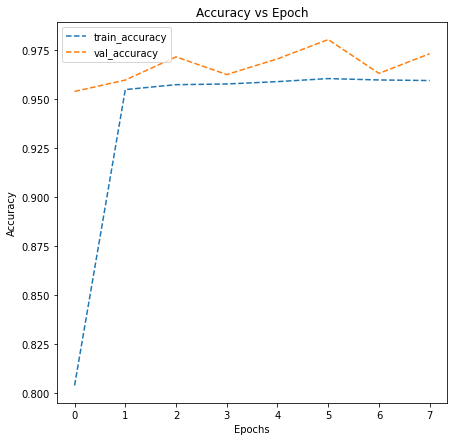

In [ ]:
# plotting the accuracies
plot_accuracy(history4)

#####**Observations and insights: _____**

*   training and validation accuracy are close to each other with a slight difference, we are not punished by overfitting, the model should perform well on the testing data



####<b> Evaluating the model

In [ ]:
# Evaluating the model on test data
accuracy4 = model4.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy4[1])


82/82 [==============================] - 0s 3ms/step - loss: 0.1538 - accuracy: 0.9496

 Test_Accuracy:- 0.9496153593063354
82/82 [==============================] - 0s 3ms/step - loss: 0.1646 - accuracy: 0.9531

 Test_Accuracy:- 0.9530768990516663
82/82 [==============================] - 0s 4ms/step - loss: 0.1936 - accuracy: 0.9362

 Test_Accuracy:- 0.9361538290977478
82/82 [==============================] - 0s 4ms/step - loss: 0.1607 - accuracy: 0.9550

 Test_Accuracy:- 0.9549999833106995
82/82 [==============================] - 1s 10ms/step - loss: 0.1190 - accuracy: 0.9588

 Test_Accuracy:- 0.9588461518287659


<b>Plotting the classification report and confusion matrix

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1300
           1       0.97      0.95      0.96      1300

    accuracy                           0.96      2600
   macro avg       0.96      0.96      0.96      2600
weighted avg       0.96      0.96      0.96      2600



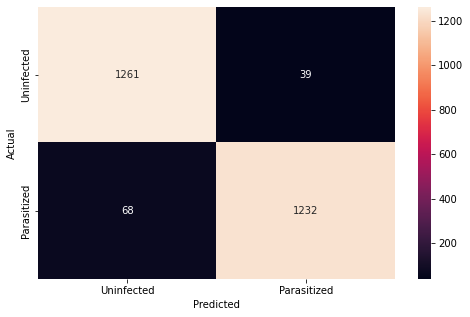

In [ ]:
# Plot the confusion matrix and generate a classification report for the model
pred = model4.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_labels,axis = 1)

#Printing the classification report
print(classification_report(y_true,pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

####<b>Think about it:</b>
*  What observations and insights can be drawn from the confusion matrix and classification report?

The confusion matrix is showing a little less FP (39) than TN (68), however the accuracy is good in general


*  Choosw the model with the best accuracy scores from all the above models and save it as a final model.


In [252]:
model4_blr= keras.models.clone_model(model4)
model4_blr.compile(loss='binary_crossentropy', optimizer=adam, metrics = ['accuracy'])
history4_blr = model4_blr.fit(X_train_blr,y_train_blr,batch_size=64,callbacks=callbacks,epochs=20,verbose=1,validation_split=0.2)
accuracy4_blr = model4_blr.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy4_blr[1])

model4_hsv= keras.models.clone_model(model4)
model4_hsv.compile(loss='binary_crossentropy', optimizer=adam, metrics = ['accuracy'])
history4_hsv = model4_hsv.fit(X_train_hsv,y_train_hsv,batch_size=16,callbacks=callbacks,epochs=20,verbose=1,validation_split=0.2)
accuracy4_hsv = model4_hsv.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy4_hsv[1])

Epoch 1/20
250/250 [==============================] - 14s 50ms/step - loss: 0.8274 - accuracy: 0.5047 - val_loss: 0.6933 - val_accuracy: 0.4940
Epoch 2/20
250/250 [==============================] - 11s 46ms/step - loss: 0.6932 - accuracy: 0.4927 - val_loss: 0.6931 - val_accuracy: 0.5060
Epoch 3/20
250/250 [==============================] - 11s 46ms/step - loss: 0.6932 - accuracy: 0.4993 - val_loss: 0.6931 - val_accuracy: 0.5060
Epoch 4/20
250/250 [==============================] - 11s 46ms/step - loss: 0.6932 - accuracy: 0.4967 - val_loss: 0.6931 - val_accuracy: 0.5060
Epoch 5/20
250/250 [==============================] - 11s 46ms/step - loss: 0.6932 - accuracy: 0.4941 - val_loss: 0.6931 - val_accuracy: 0.5060
Epoch 6/20
82/82 [==============================] - 1s 9ms/step - loss: 0.6932 - accuracy: 0.5000

 Test_Accuracy:- 0.5
Epoch 1/20
999/999 [==============================] - 23s 22ms/step - loss: 113.9903 - accuracy: 0.5051 - val_loss: 0.6932 - val_accuracy: 0.4940
Epoch 2/20
999

In [253]:
print('\n', 'Test_Accuracy:-', accuracy[1])
print('\n', 'Test_Accuracy:-', accuracy1[1])
print('\n', 'Test_Accuracy:-', accuracy2[1])
print('\n', 'Test_Accuracy:-', accuracy3[1])
print('\n', 'Test_Accuracy:-', accuracy3_hsv[1])
print('\n', 'Test_Accuracy:-', accuracy3_blr[1])
print('\n', 'Test_Accuracy:-', accuracy4[1])

print('\n', 'Test_Accuracy:-', accuracy4_hsv[1])
print('\n', 'Test_Accuracy:-', accuracy4_blr[1])



 Test_Accuracy:- 0.9496153593063354

 Test_Accuracy:- 0.9530768990516663

 Test_Accuracy:- 0.9361538290977478

 Test_Accuracy:- 0.9549999833106995

 Test_Accuracy:- 0.5026922821998596

 Test_Accuracy:- 0.5

 Test_Accuracy:- 0.9588461518287659

 Test_Accuracy:- 0.5

 Test_Accuracy:- 0.5


###<b> Observations and Conclusions drawn from the final model: _____

After trying several scenarios and changing the hyperparameters, we reached the best accuracy among all previous tests, which is 97.3% on the validation data and 95.9% on the testing data.
I allowed the model to re-train VGG16 in order to reach this accuracy


**Improvements that can be done:**<br>


*  Can the model performance be improved using other pre-trained models or different CNN architecture? the mode can be imporoved by plyaing with the hyperparameters, and changeing the number of layeres, you'll find at the end of this notebook a log of the changes that i have made on each model and how it impacted the results.
*  You can try to build a model using these HSV images and compare them with your other models. 
Feeding the models with HSV and Gaussian Bluerred images did now work well, maybe we should train the model on these new images as well.


Unlike what i was expecting, using a pretrained model was useful only after re-training the network, as if i used the only the VGG structure and not knowledge.

###<b>Insights

**1.**  What are the most meaningful insights from the data relevant to the problem?

Predicting whether a blood cell is infected can be done by high accuracy, we could reach 95.9 after testing several models, meaning human lives can be saved

**2.  Comparison of various techniques and their relative performance:** How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

I have included below a comparison between the different models that I trained. Adding more neural networks has an impact on the output accuracy, but it is not always a positive impcat, changing the batchsize has a noticable impact, also reducing the dropout will allow the CNN enough data to learn from. the optimal i could find is 15% dropout.

**3.  Proposal for the final solution design:** What model do you propose to be adopted? Why is this the best solution to adopt?
I would recommend to use the model with VGG pre-trained deep network, and tune it in a way that give the best results

**4.  Key recommendations for implementation:** What are some key recommendations to implement the solutions? What should the implementation roadmap look like? What further analysis needs to be done or what other associated problems need to be solved?

The built model does not need to be frequently re-trained unless the malaria parasite eveloves, but for now, it can be deployed on a web interface or a mobile which allow users to use it for individual cell photos. it can also be implemented behind an API and allow labs to integrate it with their systems.



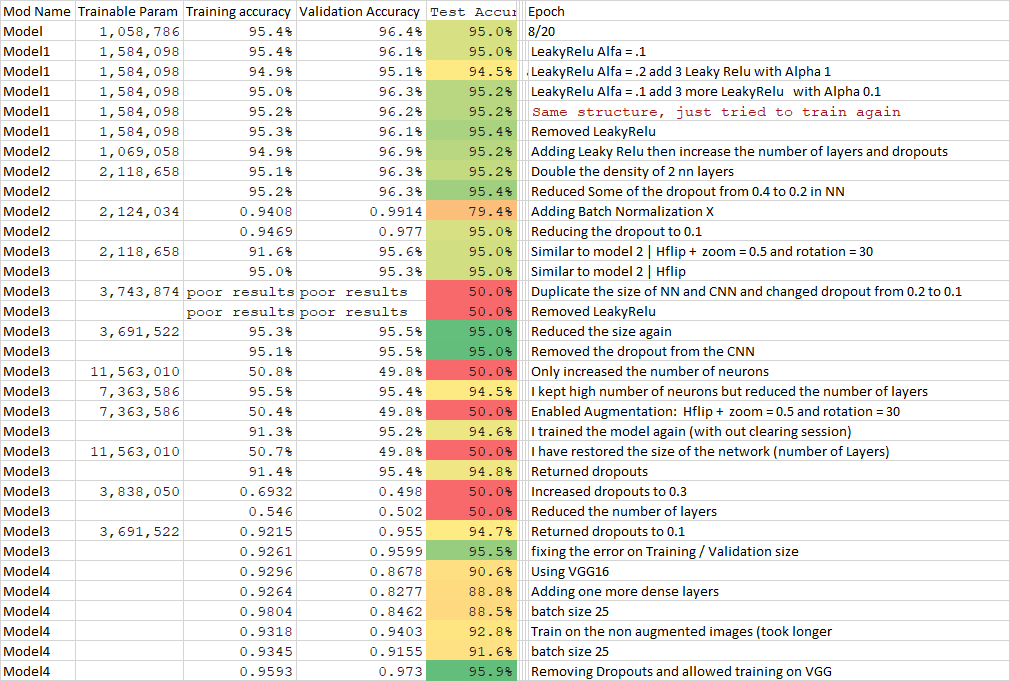